## Download LJSpeech

In [260]:
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
!tar -xjf LJSpeech-1.1.tar.bz2

--2021-11-29 23:15:49--  https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
Resolving data.keithito.com (data.keithito.com)... 174.138.79.61
Connecting to data.keithito.com (data.keithito.com)|174.138.79.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [application/octet-stream]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G  24.7MB/s    in 2m 44s  

2021-11-29 23:19:13 (16.0 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]



In [261]:
%pip install librosa

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [262]:
#!g1.1
%pip install torch==1.10.0+cu111 torchaudio==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 2137.6 MB 69 bytes/s 
     |████████████████████████████████| 2.9 MB 66.8 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.7.0 requires torch==1.6.0, but you have torch 1.10.0+cu111 which is incompatible.
mmdet 2.3.0rc0+c6b5ca2 requires Pillow<=6.2.2, but you have pillow 8.4.0 which is incompatible.
mmdet 2.3.0rc0+c6b5ca2 requires torch==1.6.0, but you have torch 1.10.0+cu111 which is incompatible.
enot-utils 1.0.2 requires torch==1.6.0, but you have torch 1.10.0+cu111 which is incompatible.
You should consider upgrading via the '/usr/local/bin/

In [ ]:
!git clone https://github.com/darya-baranovskaya/TTS_with_FastSpeach.git

In [263]:
#!g1.1
!git clone https://github.com/NVIDIA/waveglow.git
%pip install googledrivedownloader

Cloning into 'waveglow'...
remote: Enumerating objects: 190, done.
remote: Total 190 (delta 0), reused 0 (delta 0), pack-reused 190
Receiving objects: 100% (190/190), 435.41 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [264]:
#!g1.1
%pip install googledrivedownloader

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [265]:
#!g1.1
%pip install wandb

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.7 MB 2.4 MB/s 
     |████████████████████████████████| 97 kB 8.8 MB/s 
     |████████████████████████████████| 140 kB 80.5 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6488 sha256=d381d5906d70f650616a0988df2d906d3a5ff95d80f0f05741b19613c1195819
  Stored in directory: /tmp/xdg_cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8784 sha256=1864d61ff16e2f24a9efc2d3197a660382452daaf2ad7791ba4e1657d0fe94a4
  Stored in directory: /tmp/xdg_cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/pytho

In [266]:
#!g1.1
import wandb

In [267]:
#!g1.1
from typing import Tuple, Dict, Optional, List, Union
from itertools import islice

from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

In [268]:
#!g1.1
%load_ext autoreload
%autoreload 2

In [269]:
#!g1.1
from models.fastspeech_model import FastSpeech
from utils.batch_sampler import Batch
from utils.ljspeech_dataset import LJSpeechDataset, LJSpeechCollator
from utils.melspectrogram import MelSpectrogram

from configs.melspectrogram_config import MelSpectrogramConfig
from models.vocoder import Vocoder
from models.grapheme_aligner import GraphemeAligner, Point, Segment

from typing import Tuple, Dict, Optional, List, Union
from itertools import islice

from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

from IPython import display
from dataclasses import dataclass

import torch
from torch import nn

import torchaudio

import librosa
from matplotlib import pyplot as plt

import warnings
import sys
sys.path.append('waveglow/')

warnings.filterwarnings('ignore')

In [270]:
#!g1.1
%pip install waveglow

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement waveglow
ERROR: No matching distribution found for waveglow
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


## Featurizer

In [271]:
#!g1.1
featurizer = MelSpectrogram(MelSpectrogramConfig())

---

## Dataset

In [272]:
#!g1.1
dataset = LJSpeechDataset('.')

In [273]:
#!g1.1
dataset[0]

(tensor([[-7.3242e-04, -7.6294e-04, -6.4087e-04,  ...,  7.3242e-04,
           2.1362e-04,  6.1035e-05]]),
 tensor([212893], dtype=torch.int32),
 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 tensor([[27, 29, 20, 25, 31, 20, 25, 18,  6, 11, 20, 25, 11, 31, 19, 16, 11, 26,
          25, 23, 36, 11, 30, 16, 25, 30, 16, 11, 34, 20, 31, 19, 11, 34, 19, 20,
          14, 19, 11, 34, 16, 11, 12, 29, 16, 11, 12, 31, 11, 27, 29, 16, 30, 16,
          25, 31, 11, 14, 26, 25, 14, 16, 29, 25, 16, 15,  6, 11, 15, 20, 17, 17,
          16, 29, 30, 11, 17, 29, 26, 24, 11, 24, 26, 30, 31, 11, 20, 17, 11, 25,
          26, 31, 11, 17, 29, 26, 24, 11, 12, 23, 23, 11, 31, 19, 16, 11, 12, 29,
          31, 30, 11, 12, 25, 15, 11, 14, 29, 12, 17, 31, 30, 11, 29, 16, 27, 29,
          16, 30, 16, 25, 31, 16, 15, 11, 20, 25, 11, 31, 19, 16, 11, 16, 35, 19,
          20, 13, 20, 31, 20, 26, 25]]),
 t

In [274]:
#!g1.1
@dataclass
class Batch:
    waveform: torch.Tensor
    waveforn_length: torch.Tensor
    transcript: List[str]
    tokens: torch.Tensor
    token_lengths: torch.Tensor
    durations: Optional[torch.Tensor] = None
    melspec: torch.Tensor = None
    

    def to(self, device: torch.device) -> 'Batch':
        raise NotImplementedError

In [316]:
#!g1.1
device = torch.device('cuda:0')
aligner = GraphemeAligner().to(device)
featurizer = MelSpectrogram(MelSpectrogramConfig())
class LJSpeechCollator:

    def __call__(self, instances: List[Tuple]) -> Dict:
        waveform, waveforn_length, transcript, tokens, token_lengths = list(
            zip(*instances)
        )

        waveform = pad_sequence([
            waveform_[0] for waveform_ in waveform
        ]).transpose(0, 1)
        waveforn_length = torch.cat(waveforn_length)

        tokens = pad_sequence([
            tokens_[0] for tokens_ in tokens
        ]).transpose(0, 1)
        token_lengths = torch.cat(token_lengths)
        batch = Batch(waveform, waveforn_length, transcript, tokens, token_lengths)
        batch.melspec = featurizer(batch.waveform)
        lengths = []
        for i in range(batch.melspec.shape[0]):
            lengths.append(featurizer(batch.waveform[i:i + 1, :batch.waveforn_length[i]]).shape[-1])
        lengths = torch.Tensor(lengths).unsqueeze(1)
        alignes = aligner(
            batch.waveform.to(device), batch.waveforn_length, batch.transcript
        )
        batch.durations = lengths * alignes
        return batch

In [317]:
#!g1.1
dataloader = DataLoader(LJSpeechDataset('.'), batch_size=3, collate_fn=LJSpeechCollator())

In [318]:
#!g1.1
batch = next(iter(dataloader))
batch.tokens.shape

torch.Size([3, 155])

In [140]:
#!g1.1
batch.__dict__.keys()

dict_keys(['waveform', 'waveforn_length', 'transcript', 'tokens', 'token_lengths', 'durations', 'melspec'])

In [141]:
#!g1.1
print(batch.durations.shape)
print(batch.waveform.shape) 
print(batch.waveforn_length)
print(len(batch.transcript), batch.transcript[0])
print(batch.tokens.shape)
print(batch.token_lengths)
print(batch.melspec.shape)

torch.Size([3, 155])
torch.Size([3, 213149])
tensor([212893,  41885, 213149], dtype=torch.int32)
3 Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition
torch.Size([3, 155])
tensor([151,  30, 155], dtype=torch.int32)
torch.Size([3, 80, 833])


In [117]:
#!g1.1
dummy_batch = list(islice(dataloader, 1))[0]

---

## Vocoder

In [372]:
#!g1.1
from google_drive_downloader import GoogleDriveDownloader as gdd

In [373]:
#!g1.1
gdd.download_file_from_google_drive(
    file_id='1rpK8CzAAirq9sWZhe9nlfvxMF1dRgFbF',
    dest_path='./waveglow_256channels_universal_v5.pt'
)

In [374]:
#!g1.1
from models.vocoder import Vocoder

In [376]:
#!g1.1
vocoder = Vocoder().to('cuda:0').eval()

In [121]:
#!g1.1
waveform = dummy_batch.waveform[:1]
mels = featurizer(waveform).cuda()

In [122]:
#!g1.1
mels.shape

torch.Size([1, 80, 833])

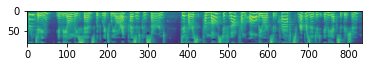

In [123]:
#!g1.1
plt.imshow(mels[0].cpu())

In [124]:
#!g1.1
reconstructed_wav = vocoder.inference(mels).cpu()

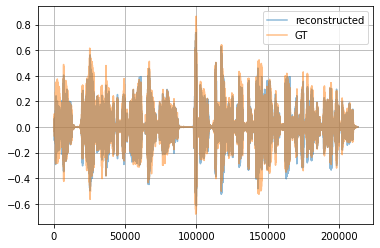

In [126]:
#!g1.1
plt.plot(reconstructed_wav.squeeze(), label='reconstructed', alpha=.5)
plt.plot(waveform.squeeze(), label='GT', alpha=.5)
plt.grid()
plt.legend()
plt.show()

In [127]:
#!g1.1
display.display(display.Audio(reconstructed_wav, rate=22050))
display.display(display.Audio(waveform, rate=22050))

---

# Model

In [175]:
#!g1.1
model.encoder.fft_blocks[0].conv[0].weight.device

device(type='cuda', index=0)

In [343]:
#!g1.1
from models.model_layers import *
from models.fastspeech_model import *

class MultiheadAttention(nn.Module):
    def __init__(self, inp_size, num_heads, kernel_size=3, device=torch.device('cuda')):
        super(MultiheadAttention, self).__init__()
        assert inp_size % num_heads == 0
        # self.inp_size =  inp_size
        out_head_size = inp_size // num_heads


        self.query_emb = nn.Sequential(
            nn.Linear(inp_size, inp_size),
            nn.ReLU())
        self.key_emb = nn.Sequential(
            nn.Linear(inp_size, inp_size),
            nn.ReLU())
        self.value_emb = nn.Sequential(
            nn.Linear(inp_size, inp_size),
            nn.ReLU())

        self.heads = [SelfAttention(inp_size, out_head_size, kernel_size).to(device) for _ in range(num_heads)]
        self.out_linear = nn.Linear(inp_size, inp_size)
        
    def forward(self, input: Tensor):
        # input.shape : bs, seq_len, emb_dim
        q = self.query_emb(input)
        k = self.key_emb(input)
        v = self.value_emb(input)
        # print("q", q.shape)
        # print("k", k.shape)
        # print("v", v.shape)

        out = []
        for i in range(len(self.heads)):
            out.append(self.heads[i](q, k, v))
        out = torch.cat(out, dim=-1)
        out = self.out_linear(out)
        return out
class FFTBlock(nn.Module):
    def __init__(self, hidden_size, num_heads, kernel_size, device):
        super(FFTBlock, self).__init__()
        self.multihead_attn = MultiheadAttention(hidden_size, num_heads, kernel_size, device)
        self.layer_norm1 = nn.LayerNorm(hidden_size)
        self.conv = nn.Sequential(nn.Conv1d(hidden_size, hidden_size, kernel_size, padding='same'),
                                  nn.ReLU(),
                                  nn.Conv1d(hidden_size, hidden_size, kernel_size, padding='same'))
        self.layer_norm2 = nn.LayerNorm(hidden_size)

    def forward(self, input: Tensor):
        # input.shape : bs, seq_len, emb_dim
        x = self.multihead_attn(input)
        x = self.layer_norm1(x + input)
        # x.shape : bs, seq_len, emb_dim
        out = torch.transpose(self.conv(torch.transpose(x, 1, 2)), 1, 2)
        out = self.layer_norm1(out + x)
        return out
    
class FastSpeechEncoder(nn.Module):
    def __init__(self, vocab_size, hidden_size, num_heads, kernel_size, n_fft_blocks, device):
        super(FastSpeechEncoder, self).__init__()
        self.tok_emb = TokenEmbedding(vocab_size, hidden_size)
        self.pos_encoding = PositionalEncoding(emb_size=hidden_size, dropout=0)
        self.fft_blocks = [FFTBlock(hidden_size, num_heads, kernel_size, device).to(device) for _ in range(n_fft_blocks)]

    def forward(self, input: Tensor):
        out = self.pos_encoding(self.tok_emb(input))
        # out.shape : bs, seq_len, emb_dim
        for i in range(len(self.fft_blocks)):
            out = self.fft_blocks[i](out)
        return out


class FastSpeechDecoder(nn.Module):
    def __init__(self, hidden_size, num_heads, kernel_size, n_fft_blocks, device):
        super(FastSpeechDecoder, self).__init__()
        self.pos_encoding = PositionalEncoding(emb_size=hidden_size, dropout=0)
        self.fft_blocks = [FFTBlock(hidden_size, num_heads, kernel_size, device).to(device) for _ in range(n_fft_blocks)]
        self.linear = nn.Linear(hidden_size, 80)

    def forward(self, input: Tensor):
        out = self.pos_encoding(input)
        for i in range(len(self.fft_blocks)):
            out = self.fft_blocks[i](out)
        out = self.linear(out)
        return out

class FastSpeech(nn.Module):
    def __init__(self,config):
        super(FastSpeech, self).__init__()
        self.encoder = FastSpeechEncoder(config.vocab_size, config.hidden_size,
                                         config.num_heads, config.kernel_size,
                                         config.n_fft_blocks, config.device)
        self.aligner = Aligner(config.hidden_size, config.kernel_size)
        self.decoder = FastSpeechDecoder(config.hidden_size, config.num_heads,
                                         config.kernel_size, config.n_fft_blocks,
                                         config.device)

    def forward(self, input, alignes=None):
        input = self.encoder(input)
        length_pred = self.aligner(input).squeeze(-1)
        out = []
        if alignes is None:
            ones = torch.ones(length_pred.shape).to(input.device)
            alignes = torch.exp(length_pred) - 1
            alignes, _ = torch.max(torch.stack([ones, alignes], dim=0), dim=0)
            alignes = torch.round(alignes).type(torch.LongTensor).to(input.device)
        for i in range(input.shape[0]):
            curr_elem = torch.repeat_interleave(input[i], alignes[i], dim=0)
            out.append(curr_elem)
        out = pad_sequence(out, batch_first=True)
        out = self.decoder(out)
        out = torch.transpose(out, 1, 2)
        return out, length_pred


In [144]:
#!g1.1
len(dataloader)

4367

# Batch overfit

In [ ]:
#!g1.1
EPOCHS = 20

In [163]:
#!g1.1
inp.device

device(type='cuda', index=0)

In [151]:
#!g1.1
torch.max(batch.tokens)

tensor(36)

In [368]:
#!g1.1
class ModelConfig:
    vocab_size: int = 37
    hidden_size: int = 384
    num_heads: int = 2
    kernel_size: int = 3
    n_fft_blocks: int = 6
    device = torch.device('cuda')
        
model = FastSpeech(ModelConfig)
model = model.to(device)


In [290]:
#!g1.1
out = model(batch.tokens.to(device))

In [243]:
#!g1.1
reconstructed_wav = vocoder.inference(batch.melspec.to(device)).cpu()

In [216]:
#!g1.1
reconstructed_wav.shape

torch.Size([3, 213248])

In [244]:
#!g1.1
display.display(display.Audio(reconstructed_wav[0], rate=22050))
display.display(display.Audio(reconstructed_wav[1], rate=22050))
display.display(display.Audio(reconstructed_wav[2], rate=22050))

In [233]:
#!g1.1
reconstructed_wav[2].detach().cpu().numpy()

array([ 0.32386392, -0.15757062, -0.11012466, ..., -0.8056268 ,
       -0.40276784,  0.07056981], dtype=float32)

In [239]:
#!g1.1
wandb.log({'image': wandb.Image(out[0][0].detach().cpu().numpy())})

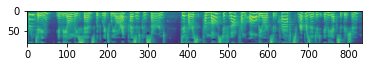

In [238]:
#!g1.1
plt.imshow(batch.melspec[0].cpu())

In [319]:
#!g1.1
inp = batch.tokens.to(device)
gt = batch.melspec.to(device)
align_gt = batch.durations

In [302]:
#!g1.1
smth = featurizer(batch.waveform[1:2, :batch.waveforn_length[1]])

In [313]:
#!g1.1
lengths = []
for i in range(batch.melspec.shape[0]):
    lengths.append(featurizer(batch.waveform[i:i + 1, :batch.waveforn_length[i]]).shape[-1])
lengths

[832, 164, 833]

In [314]:
#!g1.1
lengths = torch.Tensor(lengths).unsqueeze(1)
lengths

tensor([[832.],
        [164.],
        [833.]])

In [295]:
#!g1.1
length = batch.melspec
length, align_gt

(tensor([151,  30, 155], device='cuda:0'),
 tensor([[0.0041, 0.0062, 0.0041, 0.0062, 0.0166, 0.0041, 0.0041, 0.0062, 0.0021,
          0.0394, 0.0021, 0.0062, 0.0041, 0.0021, 0.0021, 0.0062, 0.0104, 0.0041,
          0.0083, 0.0083, 0.0041, 0.0104, 0.0124, 0.0062, 0.0062, 0.0041, 0.0041,
          0.0083, 0.0041, 0.0041, 0.0021, 0.0041, 0.0062, 0.0021, 0.0062, 0.0021,
          0.0041, 0.0041, 0.0041, 0.0083, 0.0041, 0.0104, 0.0041, 0.0041, 0.0041,
          0.0041, 0.0041, 0.0021, 0.0083, 0.0041, 0.0062, 0.0062, 0.0062, 0.0021,
          0.0041, 0.0062, 0.0062, 0.0062, 0.0041, 0.0104, 0.0145, 0.0041, 0.0083,
          0.0062, 0.0021, 0.0062, 0.0021, 0.0519, 0.0083, 0.0021, 0.0083, 0.0062,
          0.0041, 0.0104, 0.0041, 0.0228, 0.0041, 0.0062, 0.0021, 0.0041, 0.0083,
          0.0124, 0.0062, 0.0062, 0.0062, 0.0083, 0.0021, 0.0062, 0.0083, 0.0104,
          0.0062, 0.0041, 0.0062, 0.0041, 0.0062, 0.0021, 0.0041, 0.0228, 0.0021,
          0.0083, 0.0041, 0.0062, 0.0021, 0.0021, 0.004

In [337]:
#!g1.1
inp = batch.tokens.to(device)
gt = batch.melspec.to(device)
align_inp = torch.round(batch.durations).type(torch.LongTensor).to(device)
align_gt = torch.log(align_gt + 1).to(device) # revert that with torch.exp(torch.log(align_gt + 1)) - 1 

mel, align = model(inp, align_inp)

In [349]:
#!g1.1
o1.shape

torch.Size([3, 80, 155])

In [363]:
#!g1.1
mel = o1
mel = torch.cat([mel, -11.5129 * torch.ones((mel.shape[0], 80, gt.shape[-1] - mel.shape[-1])).to(device)], dim=-1)

In [365]:
#!g1.1
mel[1]

tensor([[ -0.3624,   1.4065,   0.3688,  ..., -11.5129, -11.5129, -11.5129],
        [ -0.5449,  -0.1213,  -0.2898,  ..., -11.5129, -11.5129, -11.5129],
        [ -0.9040,  -0.2473,  -0.3613,  ..., -11.5129, -11.5129, -11.5129],
        ...,
        [ -0.0987,   0.7272,  -0.1419,  ..., -11.5129, -11.5129, -11.5129],
        [ -0.4997,  -0.1836,  -1.1590,  ..., -11.5129, -11.5129, -11.5129],
        [ -0.3312,   0.3304,   0.1919,  ..., -11.5129, -11.5129, -11.5129]],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [350]:
#!g1.1
batch.melspec.shape

torch.Size([3, 80, 833])

In [351]:
#!g1.1
batch.melspec[1, ]

tensor([[ -7.7650,  -7.4054,  -7.2424,  ..., -11.5129, -11.5129, -11.5129],
        [ -7.6482,  -6.9704,  -6.8278,  ..., -11.5129, -11.5129, -11.5129],
        [ -8.0234,  -6.0235,  -5.2938,  ..., -11.5129, -11.5129, -11.5129],
        ...,
        [ -9.0136,  -8.1327,  -5.4272,  ..., -11.5129, -11.5129, -11.5129],
        [ -9.2616,  -7.2823,  -4.8653,  ..., -11.5129, -11.5129, -11.5129],
        [ -9.4484,  -7.6189,  -5.0095,  ..., -11.5129, -11.5129, -11.5129]])

In [354]:
#!g1.1
torch.ones((3, 2, 3))

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])

In [381]:
#!g1.1
# wandb.init(name='Batch_overfit1')
# N_ITERATIONS = 80000
# model.train()

# loss_fn_mel = nn.L1Loss()
# loss_fn_align = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), betas=(0.9, 0.98),
#                                  eps=1e-9)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.98999)


# mel_losses = 0
# align_losses = 0

for i in range(N_ITERATIONS):
    inp = batch.tokens.to(device)
    gt = batch.melspec.to(device)
    align_inp = torch.round(batch.durations).type(torch.LongTensor).to(device)
    align_gt = torch.log1p(batch.durations + 1).to(device) # revert that with torch.exp(torch.log(align_gt + 1)) - 1 

    mel, align = model(inp, align_inp)

    optimizer.zero_grad()
    
    if mel.shape[-1] < gt.shape[-1]:
        mel = torch.cat([mel, -11.5129 * torch.ones((mel.shape[0], 80, gt.shape[-1] - mel.shape[-1])).to(device)], dim=-1)
    elif mel.shape[-1] > gt.shape[-1]:
        with torch.no_grad():
            gt = torch.cat([gt, -11.5129 * torch.ones((gt.shape[0], 80, mel.shape[-1] - gt.shape[-1])).to(device)], dim=-1)
    mel_loss = loss_fn_mel(mel, gt)
    align_loss = loss_fn_align(align, align_gt)
    loss = mel_loss + align_loss
    loss.backward()

    optimizer.step()
    scheduler.step()
    mel_losses += mel_loss.item()
    align_losses += align_loss.item()
    wandb.log({'train_mel_loss': mel_loss, 'train_align_loss': align_losses, 'train_loss': loss})
    if i % 500 == 0:
        with torch.no_grad():
            reconstructed_wav = vocoder.inference(mel.to(device)).cpu()
            print(f"step {i} sampled_audios")
            display.display(display.Audio(reconstructed_wav[0], rate=22050))
            wandb.log({'reconstructed_wav0': wandb.Audio(reconstructed_wav[0].detach().cpu().numpy(), sample_rate=22050),
                      'reconstructed_wav1': wandb.Audio(reconstructed_wav[1].detach().cpu().numpy(), sample_rate=22050),
                      'reconstructed_wav2': wandb.Audio(reconstructed_wav[2].detach().cpu().numpy(), sample_rate=22050),
                      'melspec0': wandb.Image(mel[0].detach().cpu().numpy()),
                      'melspec1': wandb.Image(mel[1].detach().cpu().numpy()),
                      'melspec2': wandb.Image(mel[2].detach().cpu().numpy())})

step 0 sampled_audios
step 500 sampled_audios
step 1000 sampled_audios
step 1500 sampled_audios


KeyboardInterrupt: 

In [389]:
#!g1.1
wandb.init(name='Batch_overfit1')
N_ITERATIONS = 200000
model2 = FastSpeech(ModelConfig)
model2 = model2.to(device)
model2.train()
loss_fn_mel = nn.L1Loss()
loss_fn_align = nn.MSELoss()
optimizer = torch.optim.Adam(model2.parameters(), betas=(0.9, 0.98),
                                 eps=1e-9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.98999)


mel_losses = 0
align_losses = 0


for i in range(N_ITERATIONS):
    inp = batch.tokens.to(device)
    gt = batch.melspec.to(device)
    align_inp = torch.round(batch.durations).type(torch.LongTensor).to(device)
    align_gt = torch.log(batch.durations + 1).to(device) # revert that with torch.exp(torch.log(align_gt + 1)) - 1 

    mel, align = model2(inp, align_inp)

    optimizer.zero_grad()
    
    if mel.shape[-1] < gt.shape[-1]:
        mel = torch.cat([mel, -11.5129 * torch.ones((mel.shape[0], 80, gt.shape[-1] - mel.shape[-1])).to(device)], dim=-1)
    elif mel.shape[-1] > gt.shape[-1]:
        with torch.no_grad():
            gt = torch.cat([gt, -11.5129 * torch.ones((gt.shape[0], 80, mel.shape[-1] - gt.shape[-1])).to(device)], dim=-1)
    mel_loss = loss_fn_mel(mel, gt)
#     align_loss = loss_fn_align(align, align_gt)
    loss = mel_loss #+ align_loss
    loss.backward()

    optimizer.step()
    scheduler.step()
    mel_losses += mel_loss.item()
#     align_losses += align_loss.item()
    wandb.log({'train_mel_loss': mel_loss, 'train_loss': loss})
    if i % 2000 == 0:
        with torch.no_grad():
            reconstructed_wav = vocoder.inference(mel.to(device)).cpu()
            print(f"step {i} sampled_audios")
#             display.display(display.Audio(reconstructed_wav[0], rate=22050))
            wandb.log({'reconstructed_wav0': wandb.Audio(reconstructed_wav[0].detach().cpu().numpy(), sample_rate=22050),
                      'reconstructed_wav1': wandb.Audio(reconstructed_wav[1].detach().cpu().numpy(), sample_rate=22050),
                      'reconstructed_wav2': wandb.Audio(reconstructed_wav[2].detach().cpu().numpy(), sample_rate=22050),
                      'melspec0': wandb.Image(mel[0].detach().cpu().numpy()),
                      'melspec1': wandb.Image(mel[1].detach().cpu().numpy()),
                      'melspec2': wandb.Image(mel[2].detach().cpu().numpy())})

step 0 sampled_audios
step 2000 sampled_audios
step 4000 sampled_audios
step 6000 sampled_audios
step 8000 sampled_audios
step 10000 sampled_audios
step 12000 sampled_audios
step 14000 sampled_audios
step 16000 sampled_audios
step 18000 sampled_audios
step 20000 sampled_audios
step 22000 sampled_audios
step 24000 sampled_audios
step 26000 sampled_audios
step 28000 sampled_audios
step 30000 sampled_audios
step 32000 sampled_audios
step 34000 sampled_audios
step 36000 sampled_audios
step 38000 sampled_audios
step 40000 sampled_audios
step 42000 sampled_audios
step 44000 sampled_audios
step 46000 sampled_audios
step 48000 sampled_audios
step 50000 sampled_audios
step 52000 sampled_audios
step 54000 sampled_audios
step 56000 sampled_audios
step 58000 sampled_audios
step 60000 sampled_audios
step 62000 sampled_audios
step 64000 sampled_audios
step 66000 sampled_audios
step 68000 sampled_audios
step 70000 sampled_audios
step 72000 sampled_audios
step 74000 sampled_audios
step 76000 sampled_a

KeyboardInterrupt: 

# Train


In [ ]:
#!g1.1
def train_epoch(model, optimizer, dataloader, scheduler, loss_fn):
    model.train()
    mel_losses = 0
    align_losses = 0
    for batch in dataloader:
        inp = batch.tokens.to(device)
        gt = batch.melspec.to(device)
        align_gt = batch.durations.to(device)

        mel, align = model(inp)

        optimizer.zero_grad()
        
        mel_loss = loss_fn(mel,gt)
        align_loss = loss_fn(align, align_gt)
        loss = mel_loss + align_loss
        loss.backward()

        optimizer.step()
        scheduler.step()
        mel_losses += mel_loss.item()
        align_losses += align_loss.item()
        wandb.log({'train_mel_loss': mel_loss.item(), 'train_align_loss': align_losses.item(), 'train_loss': loss.item()})

    return losses / len(dataloader)

In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1


## Visualize

In [148]:
#!g1.1
index = 0

waveform = dummy_batch.waveform[index][:dummy_batch.waveforn_length[index]]
durations = dummy_batch.durations[index][:dummy_batch.token_lengths[index]]

# scale by waveform domain
durations = durations * dummy_batch.waveforn_length[index]
durations = durations.cumsum(dim=0).int()

print(dummy_batch.transcript[index])
left = 0
for right, char in zip(durations[:10], dummy_batch.transcript[index]):
    print(char)
    display.display(display.Audio(waveform[left:right], rate=22050))
    left = right
    print('-' * 99)

Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition
P
---------------------------------------------------------------------------------------------------
r
---------------------------------------------------------------------------------------------------
i
---------------------------------------------------------------------------------------------------
n
---------------------------------------------------------------------------------------------------
t
---------------------------------------------------------------------------------------------------
i
---------------------------------------------------------------------------------------------------
n
---------------------------------------------------------------------------------------------------
g
---------------------------------------------------------------------------------------------------
,
------------------------------

#Model